# Interconnect Telecommunication

## Pendahuluan

Provider telekomunikasi interconnect menginginkan peramalan tingkat churn pada pelanggan mereka. Hal ini akan mereka gunakan untuk memerlakukan pelanggan mereka, pelanggan yang diramalkan berhenti menggunakan layanan mereka akan ditawari kode promosi dan opsi paket khusus yang sekiranya lebih cocok dengan kebiasaan dari penggunaan layanan.

Opsi paket layanan yang akan diterima adalah:
1. Internet Service   (Jenis jaringan yang digunakan (fiber optics, atau DSL)
2. Online Security    (Keamanan internet seperti pemblokiran situs yang mencurigakan)
3. Online Backup      (Sistem backup cloud)
4. Device Protection  (Perangkat lunak anti-virus)
5. Tech Support       (Bantuan teknikal khusus)
6. Streaming TV       (Layanan Streaming TV)
7. Streaming Movies   (Layanan Streaming Movies)
8. Phones             (Telepon rumah)        

Diberikan data tentang pelanggan provider Interconnect yang akan membantu dalam memenuhi tugas dalam peramalan tingkat churn. Data tersebut berisi tentang:
1. Tanggal berlangganan
2. Tanggal berhenti berlangganan
3. Metode Pembayaran
4. Tagihan pembayaran
5. Paket yang digunakan
6. Data personal keluarga

## Checklist EDA (Exploratory Data Analysis)

Dari data yang telah disediakan, ada beberapa yang harus di analisa yaitu:
1. Bagaimana pola dan distribusi pada tagihan pembayaran terhadap pelanggan yang telah berhenti berlangganan?
2. Bagaimana pengaruh layanan yang diterima pelanggan terhadap keinginan untuk berhenti berlangganan?
3. Bagaimana pengaruh metode pembayaran, cicilan, dan struk terhadap keinginan untuk berhenti berlangganan?
4. Bagaimana pengaruh personal terhadap keinginan untuk berhenti berlangganan?
5. Bagaimana habit dari pelanggan yang memiliki durasi berlangganan diatas rata-rata?

## EDA (Exploratory Data Analysis)

EDA dilakukan guna menemukan insight pada data yang diberikan. Insight ini akan dijadikan acuan dasar dalam pembuatan model dan menjawab rumusan masalah yang ada.

### Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
contract = pd.read_csv("D://Data/Data/Misc/Practicum/final_provider/contract.csv")
internet = pd.read_csv("D://Data/Data/Misc/Practicum/final_provider/internet.csv")
personal = pd.read_csv("D://Data/Data/Misc/Practicum/final_provider/personal.csv")
phone = pd.read_csv("D://Data/Data/Misc/Practicum/final_provider/phone.csv")

Dilakukan pengecekan kasar di setiap data

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [5]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [7]:
#merge semua dataframe menjadi satu dataframe
telecom = pd.merge(contract,personal, on='customerID').merge(internet, on='customerID').merge(phone, on='customerID')

In [8]:
telecom.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
3,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
4,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes


In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4835 non-null   object 
 1   BeginDate         4835 non-null   object 
 2   EndDate           4835 non-null   object 
 3   Type              4835 non-null   object 
 4   PaperlessBilling  4835 non-null   object 
 5   PaymentMethod     4835 non-null   object 
 6   MonthlyCharges    4835 non-null   float64
 7   TotalCharges      4835 non-null   object 
 8   gender            4835 non-null   object 
 9   SeniorCitizen     4835 non-null   int64  
 10  Partner           4835 non-null   object 
 11  Dependents        4835 non-null   object 
 12  InternetService   4835 non-null   object 
 13  OnlineSecurity    4835 non-null   object 
 14  OnlineBackup      4835 non-null   object 
 15  DeviceProtection  4835 non-null   object 
 16  TechSupport       4835 non-null   object 


In [10]:
#ada beberapa data yang memiliki total charges bukan numerik
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')
telecom['TotalCharges'].isna().sum()

3

In [11]:
telecom.loc[telecom['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
663,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
4573,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes
4630,2775-SEFEE,2020-02-01,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,Male,0,No,Yes,DSL,Yes,Yes,No,Yes,No,No,Yes


Hanya ada 3 data disini, sebenarnya data ini adalah data pelanggan baru. Namun, untuk pemeriksaan kali ini, data ini akan diabaikan.

In [12]:
telecom = telecom.loc[~telecom['TotalCharges'].isna()]

In [13]:
#tipe TotalCharges diubah menjadi float
telecom['TotalCharges'].astype(float)

0       1889.50
1        108.15
2        151.65
3        820.50
4       1949.40
         ...   
4830    1495.10
4831    1990.50
4832    7362.90
4833     306.60
4834    6844.50
Name: TotalCharges, Length: 4832, dtype: float64

### Pola dan Distribusi Tagihan

Analisa pola dan distribusi tagihan pada pelanggan yang sudah berhenti berlangganan dan yang masih melanjutkan berlangganan.

In [14]:
kolom = ['MonthlyCharges','TotalCharges']
judul = ['Tagihan Bulanan', 'Total Tagihan']

In [15]:
#fungsi untuk membuat grafik tagihan
def grafik_tagihan(data):
    plt.figure(figsize=(7,3))
    for i in range(2):
        plt.subplot(1,2,i+1)
        sns.histplot(data[kolom[i]])
        plt.axvline(data[kolom[i]].mean(), color='red', label='Mean')
        plt.axvline(data[kolom[i]].median(), color='green', label='Median')
        plt.title(judul[i])
        plt.legend()
    plt.show()

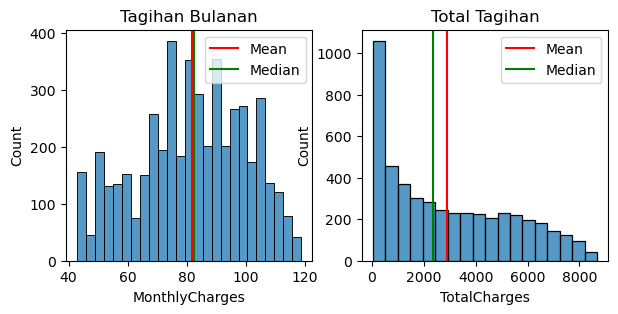

In [16]:
#grafik tagihan menyeluruh
grafik_tagihan(telecom)

Distribusi pada tagihan bulanan bisa dikatakan normal. Namun dengan melihat distribusi pada total tagihan, pelanggan banyak yang tidak melanjutkan

In [17]:
jml_churn = (telecom['EndDate']!='No').sum()

In [18]:
print(f'Pelanggan yang sudah berhenti sebanyak {jml_churn*100/len(telecom):.2f}%')

Pelanggan yang sudah berhenti sebanyak 32.82%


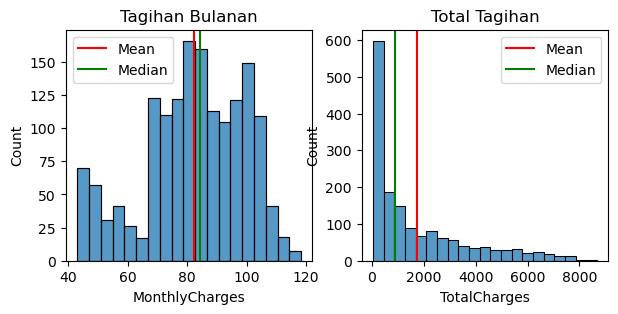

In [19]:
#grafik pada pelanggan yang sudah berhenti berlangganan
churn = telecom.loc[telecom['EndDate']!='No']
grafik_tagihan(churn)

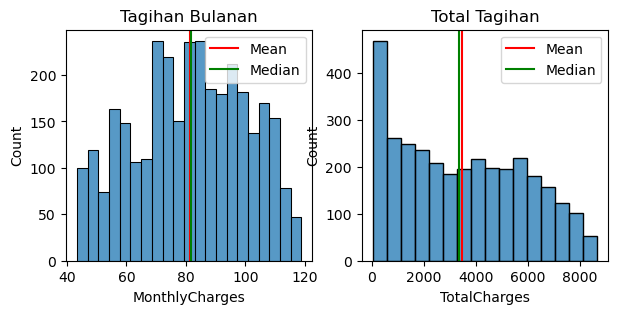

In [20]:
#grafik pada pelanggan yang masih melanjutkan berlangganan
retention = telecom.loc[telecom['EndDate']=='No']
grafik_tagihan(retention)

Dilihat dari total tagihan bulanan yang ada, belum bisa dipastikan apa yang menyebabkan pelanggan berhenti berlangganan karena keduanya masih memiliki distribusi yang hampir mirip.

### Layanan

Untuk memudahkan, replace Yes dan No menjadi 1 dan 0

In [21]:
service =['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
telecom[service] = telecom[service].replace({'Yes':1, 'No':0})
churn = telecom.loc[telecom['EndDate']!='No']
retention = telecom.loc[telecom['EndDate']=='No']

In [22]:
def jumlah_pelanggan_layanan(data,judul):
    layanan = data[service]
    layanan['TotalLayanan'] = layanan.sum(axis=1)
    plt.figure(figsize=(5,3))
    plt.title(judul)
    sns.countplot(x='TotalLayanan', hue='InternetService', data=layanan)
    plt.show()

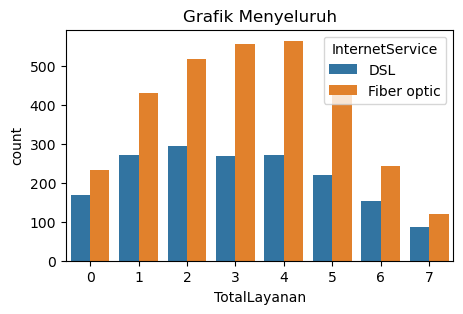

In [23]:
jumlah_pelanggan_layanan(telecom,'Grafik Menyeluruh')

Grafik diatas adalah grafik pengguna DSL atau Fiber optik dengan jumlah layanan yang digunakan ada di sumbu x.

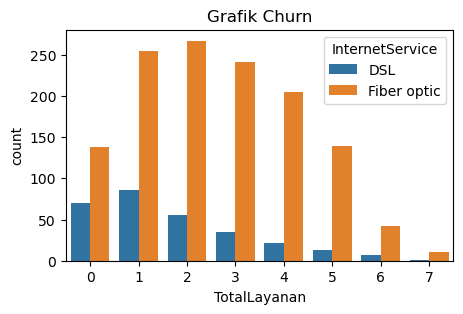

In [24]:
jumlah_pelanggan_layanan(churn,'Grafik Churn')

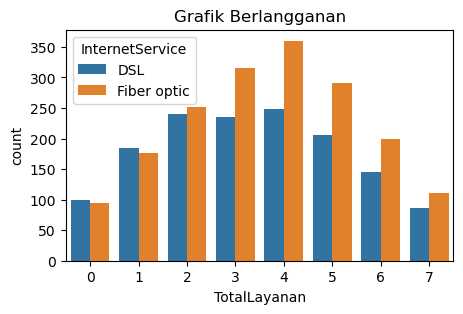

In [25]:
jumlah_pelanggan_layanan(retention,'Grafik Berlangganan')

In [26]:
harga_fiber = telecom.loc[telecom["InternetService"]!='DSL'].MonthlyCharges.mean() - telecom.loc[telecom['InternetService']=='DSL'].MonthlyCharges.mean()
print('Perkiraan harga fiber adalah', harga_fiber)

Perkiraan harga fiber adalah 27.10741606532561


Pengguna Fiber optik banyak yang berhenti berlangganan. Padahal biasanya penggunaan fiber optik lebih bagus dibanding DSL. Berarti mungkin pengguna layanan ini bukan mementingkan kecepatan internetnya. Selanjutnya dicek terkait penggunaan teleponnya.

In [27]:
service.remove('InternetService')

In [28]:
for i in service:
    smw = telecom[i].sum()
    chun = churn[i].sum()
    ret = retention[i].sum()
    print(f'Pengguna {i} sebanyak {smw/len(telecom)} pada data menyeluruh')
    print(f'Pengguna {i} sebanyak {chun/len(churn)} pada data churn')
    print(f'Pengguna {i} sebanyak {ret/len(retention)} pada data berlangganan')
    print('')

Pengguna OnlineSecurity sebanyak 0.35885761589403975 pada data menyeluruh
Pengguna OnlineSecurity sebanyak 0.1677175283732661 pada data churn
Pengguna OnlineSecurity sebanyak 0.452248921749846 pada data berlangganan

Pengguna OnlineBackup sebanyak 0.44267384105960267 pada data menyeluruh
Pengguna OnlineBackup sebanyak 0.29760403530895335 pada data churn
Pengguna OnlineBackup sebanyak 0.5135551447935921 pada data berlangganan

Pengguna DeviceProtection sebanyak 0.4377069536423841 pada data menyeluruh
Pengguna DeviceProtection sebanyak 0.31273644388398486 pada data churn
Pengguna DeviceProtection sebanyak 0.49876771410967347 pada data berlangganan

Pengguna TechSupport sebanyak 0.36278973509933776 pada data menyeluruh
Pengguna TechSupport sebanyak 0.17780580075662042 pada data churn
Pengguna TechSupport sebanyak 0.45317313616759086 pada data berlangganan

Pengguna StreamingTV sebanyak 0.5008278145695364 pada data menyeluruh
Pengguna StreamingTV sebanyak 0.4728877679697352 pada data churn

Hanya sedikit pengguna yang menggunakan Online Security dan Tech Support, apakah ini masalah biaya?

In [29]:
for i in service:
    harga = telecom.loc[telecom[i]==1].MonthlyCharges.mean() - telecom.loc[telecom[i]!=1].MonthlyCharges.mean()
    print(f'Perkiraan harga layanan {i} adalah {harga}')

Perkiraan harga layanan OnlineSecurity adalah 3.6106145610183376
Perkiraan harga layanan OnlineBackup adalah 11.095419886752978
Perkiraan harga layanan DeviceProtection adalah 14.551525061973066
Perkiraan harga layanan TechSupport adalah 6.952237411595462
Perkiraan harga layanan StreamingTV adalah 22.704847148554848
Perkiraan harga layanan StreamingMovies adalah 22.673253780731557
Perkiraan harga layanan MultipleLines adalah 16.908736632579746


Insight yang bisa didapatkan dari hasil analisa diatas adalah
1. Hanya sedikit pengguna Online Security dan Tech Support yang churn.
2. Namun memang beberapa pengguna Online Security dan Tech support masih sedikit. 
3. Harga Online Security dan TechSupport cukup terjangkau.
4. Perbedaan harga DSL dengan Fiber optik cukup jauh yaitu 27 unit(dolar?)
5. Harga layanan Streaming TV dan Movies hampir sama yaitu 22 unit.


### Metode Pembayaran

Bagaimana pengaruh metode pembayaran terhadap kecondongan churn?

In [30]:
def grafik_pie(data):
    jenis = telecom[data].unique()
    v1 = []
    v2 = []
    v3 = []
    labels = []
    judul = ['Semua','Churn','Masih Berlangganan']
    for i in jenis:
        smw = (telecom[data]==i).sum()
        chun = (churn[data]==i).sum()
        ret = (retention[data]==i).sum()
        #input nilai yang nantinya akan digunakan dalam pembuatan grafik
        v1.append(smw/len(telecom))
        v2.append(chun/len(churn))
        v3.append(ret/len(retention))
        labels.append(i)
    matrix = np.vstack((v1, v2, v3))
    #transpose matrix sehingga nilai bisa dimasukkan kedalam fungsi grafik
    trnsps = np.transpose(matrix)
    #pembuatan grafik
    plt.figure(figsize=(9,6))
    for i in range(3):
        plt.subplot(3,1,i+1)
        plt.title(judul[i])
        plt.pie(trnsps[:,i], labels=labels)

In [31]:
def data_pengguna(data):
    jenis = telecom[data].unique()
    for i in jenis:
        smw = (telecom[data]==i).sum()
        chun = (churn[data]==i).sum()
        ret = (retention[data]==i).sum()
        print(f'Pengguna {i} sebanyak {smw/len(telecom)} pada data menyeluruh')
        print(f'Pengguna {i} sebanyak {chun/len(churn)} pada data churn')
        print(f'Pengguna {i} sebanyak {ret/len(retention)} pada data berlangganan')
        print('')

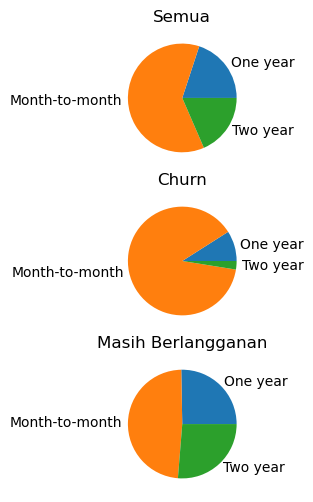

In [32]:
grafik_pie('Type')

In [33]:
data_pengguna('Type')

Pengguna One year sebanyak 0.19950331125827814 pada data menyeluruh
Pengguna One year sebanyak 0.09016393442622951 pada data churn
Pengguna One year sebanyak 0.2529266789895256 pada data berlangganan

Pengguna Month-to-month sebanyak 0.6156870860927153 pada data menyeluruh
Pengguna Month-to-month sebanyak 0.8846153846153846 pada data churn
Pengguna Month-to-month sebanyak 0.48428835489833644 pada data berlangganan

Pengguna Two year sebanyak 0.18480960264900662 pada data menyeluruh
Pengguna Two year sebanyak 0.025220680958385876 pada data churn
Pengguna Two year sebanyak 0.26278496611213803 pada data berlangganan



Terlihat bahwa yang berhenti berlangganan kebanyakan adalah dari metode pembayarannya yang perbulan. Sedangkan untuk yang masih berlangganan 1/4 nya adalah berlangganan langsung 1 tahun dan 2 tahun. 

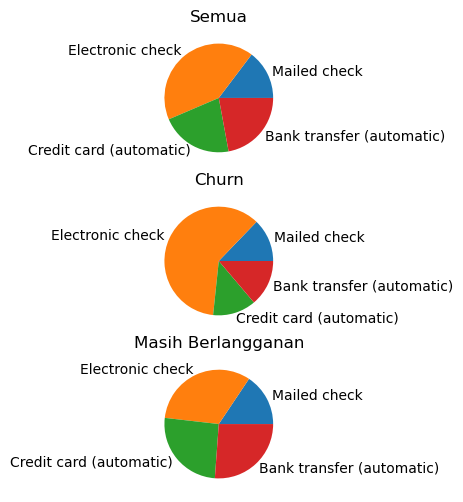

In [34]:
grafik_pie('PaymentMethod')

In [35]:
data_pengguna('PaymentMethod')

Pengguna Mailed check sebanyak 0.14693708609271522 pada data menyeluruh
Pengguna Mailed check sebanyak 0.12799495586380832 pada data churn
Pengguna Mailed check sebanyak 0.15619223659889095 pada data berlangganan

Pengguna Electronic check sebanyak 0.41742549668874174 pada data menyeluruh
Pengguna Electronic check sebanyak 0.605296343001261 pada data churn
Pengguna Electronic check sebanyak 0.32563154651879234 pada data berlangganan

Pengguna Credit card (automatic) sebanyak 0.2146109271523179 pada data menyeluruh
Pengguna Credit card (automatic) sebanyak 0.12862547288776796 pada data churn
Pengguna Credit card (automatic) sebanyak 0.25662353666050525 pada data berlangganan

Pengguna Bank transfer (automatic) sebanyak 0.22102649006622516 pada data menyeluruh
Pengguna Bank transfer (automatic) sebanyak 0.13808322824716268 pada data churn
Pengguna Bank transfer (automatic) sebanyak 0.26155268022181144 pada data berlangganan



Electronic Check bisa dibilang mendominasi pada pelanggan yang berhenti berlangganan, dan metode yang paling banyak digunakan oleh pelanggan yang masih berlangganan adalah menggunakan metode credit card secara automatis.

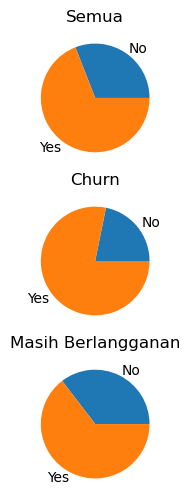

In [36]:
grafik_pie('PaperlessBilling')

In [37]:
data_pengguna('PaperlessBilling')

Pengguna No sebanyak 0.3093956953642384 pada data menyeluruh
Pengguna No sebanyak 0.21815889029003782 pada data churn
Pengguna No sebanyak 0.3539741219963031 pada data berlangganan

Pengguna Yes sebanyak 0.6906043046357616 pada data menyeluruh
Pengguna Yes sebanyak 0.7818411097099621 pada data churn
Pengguna Yes sebanyak 0.6460258780036968 pada data berlangganan



Seluruh pengguna baik yang masih berlangganan ataupun sudah tidak pun terlihat sama, sama sama lebih memilih menggunakan paperless billing, bisa dipastikan bahwa data ini bisa diabaikan dalam pembuatan model kedepannya.

Insight yang bisa didapatkan dari analisa ini adalah:
1. Metode pembayaran sebulan sekali bukan menjadi sebab pelanggan berhenti berlangganan, namun bisa jadi menjadi ciri bahwa pelanggan akan berhenti dibulan-bulan kemudian.
2. Metode pembayaran automatis cenderung melanjutkan berlangganan.
3. Metode pembayaran electronic check merupakan metode yang bisa jadi menjadi ciri bahwa pelanggan tidak melanjutkan berlangganan.

### Personal

Selanjutnya adalah menganalisa terhadap data personal

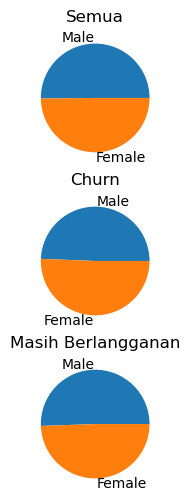

In [38]:
grafik_pie('gender')

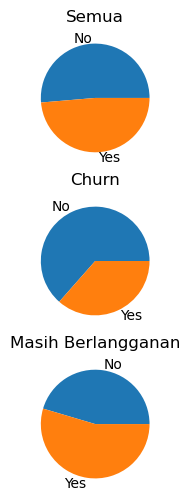

In [39]:
grafik_pie('Partner')

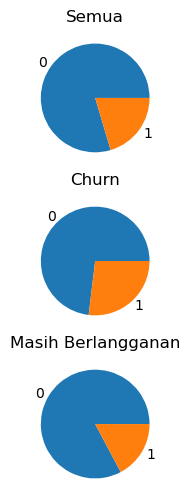

In [40]:
grafik_pie('SeniorCitizen')

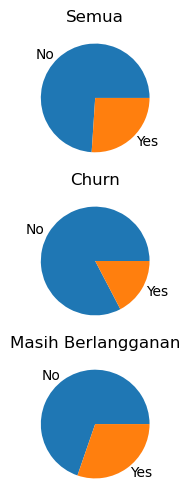

In [41]:
grafik_pie('Dependents')

Insight yang bisa didapatkan dari analisa ini adalah:
1. Dari data personal yang ada, didapatkan bahwa hanya `Partner` yang memiliki pola tersendiri tentang berhenti berlangganannya suatu pelanggan.
2. `Dependents`, `SeniorCitizen`, dan `Gender` tidak terlalu berpengaruh karena tidak ada perbedaan pola yang mencolok.

### Durasi berlangganan

Untuk durasi berlangganan sendiri yang bisa jadi saling terikat adalah biaya bulanannya dan tipe pembayarannya (sebulan sekali atau bagaimana)

In [42]:
telecom['Durasi'] = (telecom['TotalCharges']/telecom['MonthlyCharges']).round()

In [43]:
durasi = telecom[['customerID','MonthlyCharges','Durasi','Type','EndDate']]

In [44]:
durasi['Churn'] = durasi['EndDate'].apply(lambda x: 'Masih Berlangganan' if x == 'No' else 'Churn')

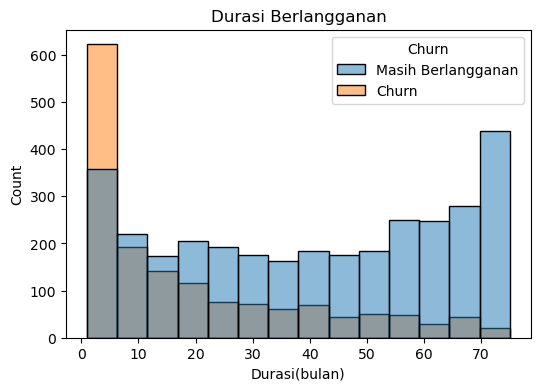

In [45]:
plt.figure(figsize=(6,4))
sns.histplot(durasi, x='Durasi', hue='Churn')
plt.title('Durasi Berlangganan')
plt.xlabel('Durasi(bulan)')
plt.show()

Dari grafik diatas terlihat bahwa kebanyakan pengguna lama tetap bertahan dengan provider ini.
Ya bisa jadi ini salah satu faktor yang bisa meramalkan churn-nya pelanggan karena kebanyakan pelanggan yang berhenti berlangganan merupakan pengguna baru.

Selanjutnya cari tahu layanan apa yang rata-rata digunakan oleh pengguna dengan durasi lebih dari rata-rata.

In [46]:
retention['Durasi'] = (retention['TotalCharges']/retention['MonthlyCharges']).round()
#mengambil data yang memiliki durasi langganan lebih dari rata rata
avg = retention.loc[retention['Durasi']>=retention['Durasi'].mean()]

In [47]:
avg_layanan = avg[service].value_counts().to_frame().reset_index()
avg_layanan = avg_layanan.rename(columns={0: 'Jumlah Pengguna'})
avg_layanan.head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Jumlah Pengguna
0,1,1,1,1,1,1,1,188
1,0,1,1,1,1,1,1,84
2,0,1,1,0,1,1,1,67
3,1,0,1,1,1,1,1,52
4,1,1,1,0,1,1,1,52


Dilihat dari tabel diatas, terlihat bahwa kebanyakan pengguna yang memiliki diatas rata-rata menggunakan semua layanan. Dengan prioritas sebagai berikut
1. Tanpa Online Security
2. Tanpa Tech Support
3. tanpa Online Backup

Ketiga layanan diatas bisa dijadikan kunci promosi, ada dua pilihan, yaitu promosi penambahan layanan atau bahkan pengurangan layanan.

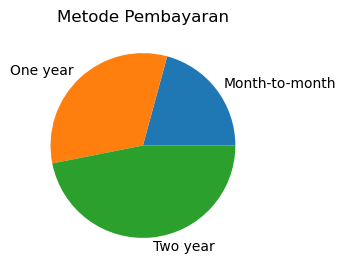

In [48]:
plt.figure(figsize=(6,3))
plt.title('Metode Pembayaran')
plt.pie(avg.groupby('Type').count()['customerID'], labels=avg.groupby('Type').count()['customerID'].index)
plt.show()

Pembayaran perbulan bukan menjadi pilihan utama pelanggan tetap.

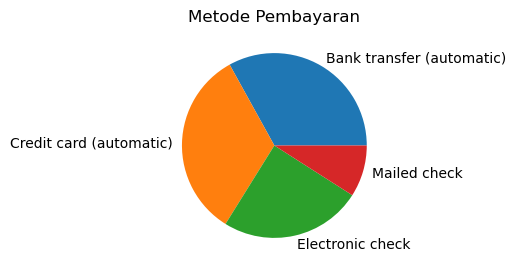

In [49]:
plt.figure(figsize=(6,3))
plt.title('Metode Pembayaran')
plt.pie(avg.groupby('PaymentMethod').count()['customerID'], labels=avg.groupby('PaymentMethod').count()['customerID'].index)
plt.show()

Pembayaran otomatis menjadi pilihan utama.

## Kesimpulan

Dari hasil EDA yang dilakukan, didapatkan bahwa:
1. Distribusi tagihan pembayaran terlihat memiliki pola yang mirip antara pelanggan yang masih berlangganan maupun yang sudah berhenti, jumlah tagihan perbulannya pun hampir mirip, yaitu ada di angka 80.
2. Kebanyakan yang menggunakan layanan `OnlineSecurity` dan `TechSupport` memiliki kecenderungan untuk melanjutkan berlangganan. Pun ada beberapa yang hanya menggunakan layanan internetnya saja, itupun menggunakan DSL yang lebih murah dibanding fiber optic. 
3. Metode pembayaran perbulan dan pembayaran manual bisa jadi sarang dari pelanggan yang memiliki kecenderungan untuk berhenti berlangganan, untuk struk tidak terlalu berpengaruh.
4. Hanya data `Partner` yang menunjukkan perbedaan mencolok antara pelanggan yang berhenti berlangganan dengan yang masih berlangganan.
5. Untuk pelanggan dengan durasi berlangganan diatas rata rata memiliki habit yaitu menggunakan semua layanan, menggunakan metode pembayaran otomatis dan membayar langsung selama 1 tahun dan 2 tahun.

## Perencanaan yang akan dilakukan

Perencanaan yang akan dilakukan adalah
1. Menganalisa kembali fitur yang akan digunakan dalam pemodelan machine learning.
2. Membuat Baseline Model
3. Membuat Model Klasifikasi (Logistic Regression, Random Forest, Gradient Boosting, dan Neural Network)
4. Melakukan Hyperparameter tuning jika hasil belum memuaskan
5. Pembuatan laporan

## Feature & Target Checking

Setelah dilakukan EDA, analisa dilakukan kembali untuk menentukan feature apa saja yang akan digunakan untuk membuat modelling machine learning.

In [50]:
telecom.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Durasi'],
      dtype='object')

In [51]:
telecom.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Durasi
0,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,DSL,1,0,1,0,0,0,0,33.0
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,DSL,1,1,0,0,0,0,0,2.0
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,Fiber optic,0,0,0,0,0,0,0,2.0
3,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50,Female,0,...,No,Fiber optic,0,0,1,0,1,1,1,8.0
4,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Male,0,...,Yes,Fiber optic,0,1,0,0,1,0,1,22.0


Telaah kembali kolom mana yang akan dijadikan fitur dan target.
1. `customerID` tidak dimasukkan karena hanya berisi key unik para pelanggan yang tidak ada sangkut pautnya dengan bagaimana pelanggan menggunakan layanan ini.
2. `BeginDate` dan `EndDate` digunakan namun untuk meringkasnya, dibuat kolom baru menjadi durasi bulan, yaitu berapa lama pelanggan sudah menggunakan provider ini.
3. Metode pembayaran akan digunakan, namun disini akan dibuat one hot encoding, one year, month to month dan two year.
4. `PaperlessBilling` tidak akan digunakan karena setelah dilihat distribusinya, baik pelanggan yang masih berlangganan maupun yang sudah churn pun terlihat sama.
5. `PaymentMethod` akan digunakan dan akan dibuat one hot encoding, karena jika dilihat, para pelanggan yang menggunakan pembayaran otomatis kebanyakan masih berlangganan.
6. `MonthlyCharges` dan `TotalCharges` akan digunakan salah satu, yaitu `TotalCharges`nya saja, karena `TotalCharges` bisa dibilang mencakup `MonthlyCharges` dan `Durasi`.
7. `Gender`, `SeniorCitizen`, dan `Dependents` tidak akan digunakan karena tidak terlalu nampak perbedaan yang jelas dari pelanggan yang berlangganan dan yang sudah tidak.
8. `Partner` akan digunakan, hal ini terlihat bahwa ada perbedaan dari yang sudah memiliki partner dan belum memiliki partner, label encoding akan digunakan untuk data ini.
9. `InternetService` juga akan digunakan, karena ini akan berpengaruh terhadap layanan yang diterima oleh pelanggan. Label encoding akan digunakan untuk data ini.
10. Semua layanan yang disediakan provider akan digunakan, seperti `OnlineSecurity`, `OnlineBackup` dan seterusnya. Karena data sudah dibuat label encoding sehingga tidak perlu diproses kembali.

Jadi, kolom yang akan digunakan sebagai fitur adalah
1. `TotalCharges`
2. Cicilan (`Type`) (One Hot Encoding)
3. `PaymentMethod` (One Hot Encoding)
4. Layanan yang diberikan oleh provider
5. `Partner` (Label Encoding)
6. `InternetService` (Label Encoding)


In [52]:
#kolom yang harus diencoding terlebih dahulu belum dimasukan
features_col = ['TotalCharges']
#Service berupa nama kolom tentang layanan provider, ini sudah dideklarasikan sebelumnya
features_col = np.concatenate((features_col,service), axis=0)

In [53]:
# membuat dataframe baru untuk data yang akan digunakan
df = telecom[features_col]

In [54]:
#dropfirst digunakan untuk mempersingkat, karena jika keduanya bernilai 0 maka akan didefinisikan menjadi salah satu value
ohe1 = pd.get_dummies(telecom['Type'], drop_first=True)
df = df.join(ohe1)
ohe2 = pd.get_dummies(telecom['PaymentMethod'],drop_first=True)
df = df.join(ohe2)
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Partner'] = le.fit_transform(telecom['Partner'])
df['InternetService'] = le.fit_transform(telecom['InternetService'])
#targetnya adalah churn
df['churn'] = telecom['EndDate'].apply(lambda x: 1 if x == 'No' else 0)

In [55]:
df.head()

,TotalCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,One year,Two year,Credit card (automatic),Electronic check,Mailed check,Partner,InternetService,churn
0,1889.50,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1
1,108.15,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,151.65,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,820.50,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0
4,1949.40,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1


## Data Splitting

Selanjutnya adalah data splitting.
Data akan dibagi dengan proporsi :
1. Training dataset 75%
2. Validation dataset 15%
3. Test dataset 10%

In [56]:
#library splitting data
from sklearn.model_selection import train_test_split
#pendefinisian features dan target
features = df.drop(['churn'],axis=1)
target= df['churn']
#random_state digunakan untuk mempertahankan pseudo-random nya untuk menghasilkan hasil yang konsisten
features_train, features_sisa, target_train, target_sisa = train_test_split(features,
                                                                            target, 
                                                                            train_size=0.75, 
                                                                            random_state=12)
features_valid, features_test, target_valid, target_test = train_test_split(features_sisa,
                                                                            target_sisa, 
                                                                            train_size=0.6, 
                                                                            random_state=12)

In [57]:
print(f'Size train dataset adalah {round(len(features_train)/len(features)*100)}%')
print(f'Size validation dataset adalah {round(len(features_valid)/len(features)*100)}%')
print(f'Size test dataset adalah {round(len(features_test)/len(features)*100)}%')

Size train dataset adalah 75%
Size validation dataset adalah 15%
Size test dataset adalah 10%


Data sudah dipisah

In [58]:
target_train.value_counts()/len(target_train)

1    0.666667
0    0.333333
Name: churn, dtype: float64

Nilai masih tidak balance antara kelas churn dan tidak, maka dalam modelling akan dibagi menjadi 2 bagian yaitu dengan dataset normal dan upsample.

## Modelling

Setelah data dipisah, selanjutnya adalah pembuatan model machine learning.
Metric yang akan digunakan adalah AUC-ROC dengan metric tambahan yaitu akurasi, dengan tujuan mendapatkan nilai AUC-ROC lebih besar dari 0.85 .

### Baseline Model

Sebelum membuat model yang sebenarnya, dibuat dulu baseline model sebagai dasar sanitycheck.

In [59]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
#fungsi pembuatan kurva
def curve(target_valid,predict_proba):
    fpr, tpr, thresholds = roc_curve(target_valid, predict_proba)
    plt.figure(figsize=(3,2))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title('Kurva ROC')
    plt.show()

#fungsi membuat skor skor auc-roc
def score(model,features_train,target_train,features_valid,target_valid,features_test=pd.DataFrame(),target_test=pd.DataFrame()):
    #cek jika tidak ada dataset test
    if features_test.empty: 
        model.fit(features_train, target_train)
        proba = model.predict_proba(features_valid)[:,1]
        curve(target_valid,proba)
        print('Skor AUC-ROC :', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))
        print('Skor akurasi :', accuracy_score(target_valid, model.predict(features_valid)))
    #jika ada dataset test, maka dataset train dan dataset valid akan digabungkan
    else:
        model.fit(np.vstack([features_train, features_valid]), np.hstack([target_train, target_valid]))
        proba = model.predict_proba(features_test)[:, 1]
        curve(target_test,proba)
        print('Skor AUC-ROC :', roc_auc_score(target_test, model.predict_proba(features_test)[:,1]))
        print('Skor akurasi :', accuracy_score(target_test, model.predict(features_test)))

        

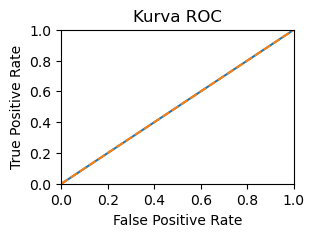

Skor AUC-ROC : 0.5
Skor akurasi : 0.6616022099447514


In [60]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
score(dummy,features_train,target_train,features_valid,target_valid)

Model baseline memiliki AUC-ROC 0.5 dan akurasi 0.66 dengan metode `most-frequent`.

### Logistic Regression

Untuk Logistic Regression, akan digunakan MinMax Scaler, hal ini dilakukan karena nilai pada kolom `Durasi` dan `MonthlyCharges` terlalu berbeda dengan kolom lainnya.

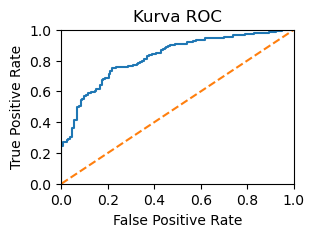

Skor AUC-ROC : 0.8229976651029283
Skor akurasi : 0.7747933884297521


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler

def scaling(data):
    scaler = MinMaxScaler()
    columns = ['TotalCharges']
    scaled_data = data.copy()
    scaler.fit(features_train[columns])
    scaled_data[columns] = scaler.transform(scaled_data[columns])
    return scaled_data
s_features_train = scaling(features_train)
s_features_valid = scaling(features_valid)
s_features_test = scaling(features_test)
#skor dengan scaler
lr = LogisticRegression(random_state=1)
score(lr,s_features_train,target_train,s_features_valid,target_valid,s_features_test,target_test)


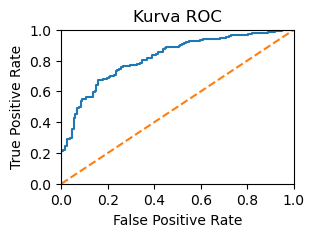

Skor AUC-ROC : 0.8193989246620826
Skor akurasi : 0.7706611570247934


In [62]:
#skor tanpa scaler
lr = LogisticRegression(random_state=1)
score(lr,features_train,target_train,features_valid,target_valid,features_test,target_test)

Model logistic regression baik dengan scaler maupun tidak menghasilkan hasil yang mirip dan mendapatkan nilai auc-roc 0.82.

### Random Forest

Untuk random forest, yang akan dituning adalah di jumlah iterasinya dan kedalamannya.

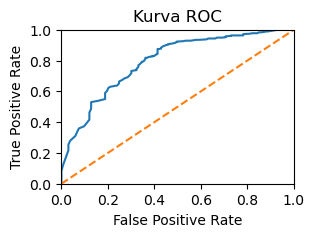

Skor AUC-ROC : 0.7941648994280572
Skor akurasi : 0.7706611570247934


In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
score(rf,features_train,target_train,features_valid,target_valid,features_test,target_test)

Tanpa dituning, Random Forest menghasilkan hasil yang lebih buruk dibanding logistic regression.

In [64]:
from bayes_opt import BayesianOptimization

In [65]:
from sklearn.model_selection import cross_val_score
def objective(n_estimators, max_depth):
    rf = RandomForestClassifier(n_estimators=int(n_estimators), 
                                max_depth=int(max_depth))
    return np.mean(cross_val_score(rf, features_train, target_train, cv=5, scoring='roc_auc'))

pbounds = {'n_estimators': (10, 200), 'max_depth': (1,5)}

#inisialisasi optimizer 
optimizer_rf = BayesianOptimization(f=objective, pbounds=pbounds, random_state=12)
optimizer_rf.maximize(n_iter=50)
print("Hyperparameter terbaik adalah:", optimizer_rf.max['params'])

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
| 1         | 0.7907    | 1.617     | 150.6     |
| 2         | 0.7989    | 2.053     | 111.4     |
| 3         | 0.7917    | 1.058     | 184.6     |
| 4         | 0.8078    | 4.603     | 16.35     |
| 5         | 0.8073    | 4.828     | 36.07     |
| 6         | 0.7979    | 3.696     | 18.82     |
| 7         | 0.7922    | 1.295     | 191.8     |
| 8         | 0.8059    | 3.208     | 191.2     |
| 9         | 0.8062    | 4.875     | 36.15     |
| 10        | 0.803     | 4.741     | 35.17     |
| 11        | 0.8047    | 3.997     | 35.97     |
| 12        | 0.8063    | 4.026     | 15.67     |
| 13        | 0.7976    | 3.634     | 16.58     |
| 14        | 0.8091    | 4.841     | 15.63     |
| 15        | 0.8056    | 4.424     | 14.74     |
| 16        | 0.8109    | 4.404     | 191.1     |
| 17        | 0.8061    | 3.964     | 190.2     |
| 18        | 0.8097    | 4.296     | 192.1     |


RandomForestClassifier(max_depth=5, n_estimators=146, random_state=1)


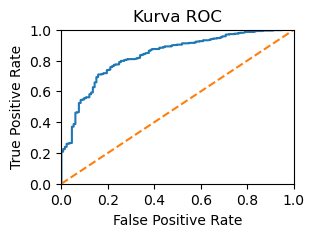

Skor AUC-ROC : 0.8348113874429663
Skor akurasi : 0.7995867768595041


In [66]:
#mendapatkan hyperparameter terbaik dan `refit` kedalam model
rf_1 = RandomForestClassifier(n_estimators=int(optimizer_rf.max['params']['n_estimators']),
                             max_depth=int(optimizer_rf.max['params']['max_depth']), random_state=1
                             )
rf_1.fit(np.vstack([features_train, features_valid]), np.hstack([target_train, target_valid]))

#mendapatkan hyperparameter terbaiknya
print(rf_1)
score(rf_1,features_train,target_train,features_valid,target_valid,features_test,target_test)

In [67]:
print('n_estimators :',int(optimizer_rf.max['params']['n_estimators']))
print('max_depth :',int(optimizer_rf.max['params']['max_depth']))

n_estimators : 146
max_depth : 5


### CatBoost

Selanjutnya adalah Catboost, dituning juga menggunakan bayesian optimizer

In [68]:
from catboost import CatBoostClassifier
def cat_objective(iterations, depth, learning_rate):
    cb = CatBoostClassifier(iterations=int(iterations), 
                            depth=int(depth), 
                            learning_rate=learning_rate, 
                            verbose=False)
    return np.mean(cross_val_score(cb, features_train, target_train, cv=5, scoring='roc_auc'))

pbounds = {'iterations': (10, 200), 'depth': (1,5), 'learning_rate': (0.01,0.3)}

#inisialisasi optimizer 
optimizer_cb = BayesianOptimization(f=cat_objective, pbounds=pbounds, random_state=1)
optimizer_cb.maximize(n_iter=50)
print("Hyperparameter terbaik adalah:", optimizer_cb.max['params'])

|   iter    |  target   |   depth   | iterat... | learni... |
-------------------------------------------------------------
| 1         | 0.8079    | 2.668     | 146.9     | 0.01003   |
| 2         | 0.8076    | 2.209     | 37.88     | 0.03678   |
| 3         | 0.8144    | 1.745     | 75.66     | 0.1251    |
| 4         | 0.8198    | 3.155     | 89.65     | 0.2087    |
| 5         | 0.8052    | 1.818     | 176.8     | 0.01794   |
| 6         | 0.8195    | 3.541     | 88.75     | 0.1863    |
| 7         | 0.8134    | 5.0       | 110.4     | 0.01      |
| 8         | 0.8093    | 3.94      | 10.01     | 0.2661    |
| 9         | 0.8158    | 4.929     | 96.65     | 0.2625    |
| 10        | 0.7843    | 5.0       | 200.0     | 0.3       |
| 11        | 0.8186    | 1.0       | 126.8     | 0.3       |
| 12        | 0.8134    | 5.0       | 57.55     | 0.3       |
| 13        | 0.8161    | 4.972     | 132.2     | 0.1646    |
| 14        | 0.8186    | 4.985     | 122.8     | 0.02506   |
| 15    

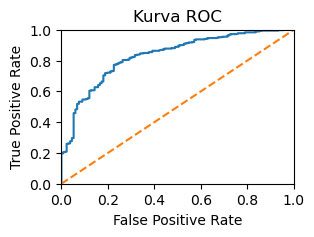

Skor AUC-ROC : 0.8315446736499368
Skor akurasi : 0.7892561983471075


In [69]:
#mendapatkan hyperparameter terbaik dan `refit` kedalam model
cb_1 = CatBoostClassifier(iterations=int(optimizer_cb.max['params']['iterations']),
                             depth=int(optimizer_cb.max['params']['depth']),
                          learning_rate=(optimizer_cb.max['params']['learning_rate']),
                          random_state=1,verbose=False
                             )
cb_1.fit(np.vstack([features_train, features_valid]), np.hstack([target_train, target_valid]))

#mendapatkan hyperparameter terbaiknya
score(cb_1,features_train,target_train,features_valid,target_valid,features_test,target_test)

In [70]:
print('iteration :', int(optimizer_cb.max['params']['iterations']))
print('depth :', int(optimizer_cb.max['params']['depth']))
print('learning_rate :',(optimizer_cb.max['params']['learning_rate']))

iteration : 136
depth : 3
learning_rate : 0.07951634550730827


### XGBoost

In [71]:
import xgboost as xgb

def xg_objective(n_estimators, max_depth, learning_rate):
    xg = xgb.XGBClassifier(n_estimators=int(n_estimators), 
                            max_depth=int(max_depth), 
                            learning_rate=learning_rate)
    return np.mean(cross_val_score(xg, features_train, target_train, cv=5, scoring='roc_auc'))

pbounds = {'n_estimators': (10, 200), 'max_depth': (1,5), 'learning_rate': (0.01,0.3)}

optimizer_xg = BayesianOptimization(f=xg_objective, pbounds=pbounds, random_state=1)
optimizer_xg.maximize(n_iter=50)
print("Hyperparameter terbaik adalah:", optimizer_xg.max['params'])

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | 0.8108    | 0.1309    | 3.881     | 10.02     |
| 2         | 0.8034    | 0.09768   | 1.587     | 27.54     |
| 3         | 0.8164    | 0.06402   | 2.382     | 85.39     |
| 4         | 0.8179    | 0.1663    | 2.677     | 140.2     |
| 5         | 0.8116    | 0.06929   | 4.512     | 15.2      |
| 6         | 0.8133    | 0.1703    | 3.799     | 139.7     |
| 7         | 0.8184    | 0.1326    | 1.481     | 139.7     |
| 8         | 0.8188    | 0.2746    | 1.153     | 142.4     |
| 9         | 0.8185    | 0.03742   | 3.682     | 145.2     |
| 10        | 0.8192    | 0.2086    | 1.096     | 148.1     |
| 11        | 0.8049    | 0.2121    | 4.563     | 149.8     |
| 12        | 0.8189    | 0.1622    | 1.06      | 145.2     |
| 13        | 0.8164    | 0.1261    | 1.944     | 90.39     |
| 14        | 0.8175    | 0.09369   | 4.418     | 94.85     |
| 15    

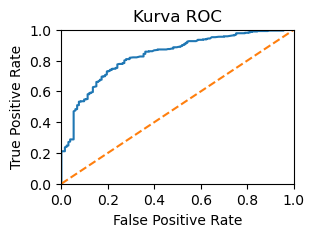

Skor AUC-ROC : 0.8319730951309898
Skor akurasi : 0.7933884297520661


In [72]:
#mendapatkan hyperparameter terbaik dan `refit` kedalam model
xg_1 = xgb.XGBClassifier(n_estimators=int(optimizer_xg.max['params']['n_estimators']),
                             max_depth=int(optimizer_xg.max['params']['max_depth']),
                          learning_rate=(optimizer_xg.max['params']['learning_rate']),
                          random_state=1
                             )
xg_1.fit(np.vstack([features_train, features_valid]), np.hstack([target_train, target_valid]))

#mendapatkan hyperparameter terbaiknya
score(xg_1,features_train,target_train,features_valid,target_valid,features_test,target_test)

In [73]:
print('n_estimators :', int(optimizer_xg.max['params']['n_estimators']))
print('max_depth :', int(optimizer_xg.max['params']['max_depth']))
print('learning_rate :',(optimizer_xg.max['params']['learning_rate']))

n_estimators : 117
max_depth : 1
learning_rate : 0.3


### Neural Network

In [74]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC

In [75]:
from tensorflow.keras.optimizers import Adam
nn = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=features_train.shape[1]),
    layers.Dense(1, activation='sigmoid')
])

learning_rate=0.01
nn.compile(optimizer=Adam(learning_rate=learning_rate),
            loss='binary_crossentropy',metrics=AUC())
nn.fit(features_train,target_train,epochs=15,validation_data=(features_valid, target_valid))
predicted = nn.predict(features_test)
print('Skor AUC-ROC :', roc_auc_score(target_test, predicted))

Epoch 1/15
114/114 [==============================] - 1s 4ms/step - loss: 10.4713 - auc: 0.6026 - val_loss: 0.7752 - val_auc: 0.8055
Epoch 2/15
114/114 [==============================] - 0s 2ms/step - loss: 16.2880 - auc: 0.5893 - val_loss: 23.6663 - val_auc: 0.4600
Epoch 3/15
114/114 [==============================] - 0s 2ms/step - loss: 8.4914 - auc: 0.6302 - val_loss: 2.9836 - val_auc: 0.6738
Epoch 4/15
114/114 [==============================] - 0s 2ms/step - loss: 4.0373 - auc: 0.6902 - val_loss: 4.6417 - val_auc: 0.7143
Epoch 5/15
114/114 [==============================] - 0s 2ms/step - loss: 4.1923 - auc: 0.6885 - val_loss: 3.4646 - val_auc: 0.7209
Epoch 6/15
114/114 [==============================] - 0s 2ms/step - loss: 4.1545 - auc: 0.6679 - val_loss: 4.6582 - val_auc: 0.4942
Epoch 7/15
114/114 [==============================] - 0s 2ms/step - loss: 4.3786 - auc: 0.6536 - val_loss: 2.4515 - val_auc: 0.7376
Epoch 8/15
114/114 [==============================] - 0s 2ms/step - loss:

Didapatkan skor auc_roc sebesar 0.825. Hasil yang serupa dengan model model lain.

## Upsampling Model

In [76]:
#generate data upsampling
from imblearn.over_sampling import ADASYN

def upsample(features, target, ratio=0.67):
    adasyn = ADASYN(sampling_strategy=ratio, random_state=12345)
    features_upsampled, target_upsampled = adasyn.fit_resample(features, target)
    return features_upsampled, target_upsampled

u_features_train, u_target_train = upsample(features_train, target_train)

In [77]:
print(u_target_train.value_counts())

1    2416
0    1350
Name: churn, dtype: int64


### Logistic Regression  Upsampled

Seperti sebelumnya,MinMaxScaler akan digunakan untuk Logistic Regression.

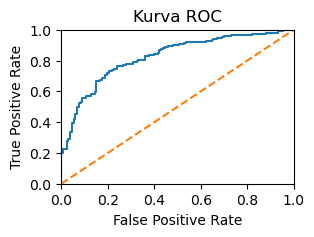

Skor AUC-ROC : 0.8238545080650344
Skor akurasi : 0.7727272727272727


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler

def scaling(data):
    scaler = MinMaxScaler()
    columns = ['TotalCharges']
    scaled_data = data.copy()
    scaler.fit(u_features_train[columns])
    scaled_data[columns] = scaler.transform(scaled_data[columns])
    return scaled_data
us_features_train = scaling(u_features_train)
us_features_valid = scaling(features_valid)
#skor dengan scaler
lr = LogisticRegression(random_state=1)
score(lr,us_features_train,u_target_train,us_features_valid,target_valid,s_features_test,target_test)

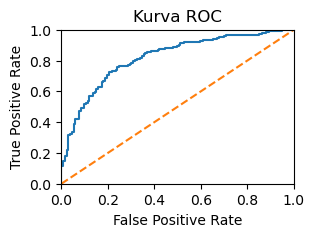

Skor AUC-ROC : 0.818991924255082
Skor akurasi : 0.7933884297520661


In [79]:
#skor tanpa scaler
lr = LogisticRegression(random_state=1)
score(lr,u_features_train,u_target_train,features_valid,target_valid,features_test,target_test)

### Random Forest Upsampled

Untuk random forest, yang akan dituning adalah di jumlah iterasinya dan kedalamannya.

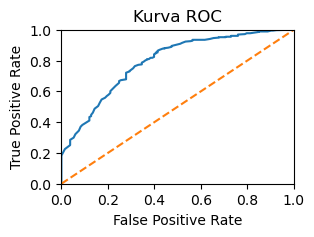

Skor AUC-ROC : 0.7923441081335819
Skor akurasi : 0.762396694214876


In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
score(rf,u_features_train,u_target_train,features_valid,target_valid,features_test,target_test)

Tanpa dituning, Random Forest menghasilkan hasil yang lebih buruk dibanding logistic regression.

In [81]:
from bayes_opt import BayesianOptimization

In [82]:
from sklearn.model_selection import cross_val_score
def objective(n_estimators, max_depth):
    rf = RandomForestClassifier(n_estimators=int(n_estimators), 
                                max_depth=int(max_depth))
    return np.mean(cross_val_score(rf, u_features_train, u_target_train, cv=10, scoring='roc_auc'))

pbounds = {'n_estimators': (10, 200), 'max_depth': (1,5)}

#inisialisasi optimizer 
optimizer_rf = BayesianOptimization(f=objective, pbounds=pbounds, random_state=12)
optimizer_rf.maximize(n_iter=50)
print("Hyperparameter terbaik adalah:", optimizer_rf.max['params'])

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
| 1         | 0.7841    | 1.617     | 150.6     |
| 2         | 0.7894    | 2.053     | 111.4     |
| 3         | 0.7802    | 1.058     | 184.6     |
| 4         | 0.7973    | 4.603     | 16.35     |
| 5         | 0.8029    | 4.828     | 36.07     |
| 6         | 0.7974    | 3.824     | 38.14     |
| 7         | 0.7991    | 4.492     | 31.72     |
| 8         | 0.7721    | 1.323     | 23.08     |
| 9         | 0.7753    | 1.011     | 34.33     |
| 10        | 0.802     | 4.66      | 34.14     |
| 11        | 0.795     | 5.0       | 12.09     |
| 12        | 0.7576    | 1.0       | 13.96     |
| 13        | 0.7974    | 4.928     | 28.64     |
| 14        | 0.8006    | 4.949     | 41.94     |
| 15        | 0.7805    | 1.714     | 42.84     |
| 16        | 0.7826    | 2.151     | 29.33     |
| 17        | 0.8005    | 4.84      | 40.05     |
| 18        | 0.8032    | 4.743     | 101.4     |


RandomForestClassifier(max_depth=5, n_estimators=146, random_state=1)


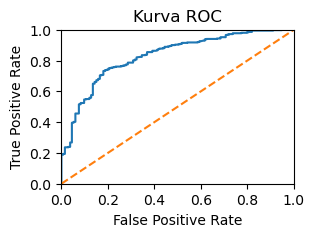

Skor AUC-ROC : 0.8308591992802519
Skor akurasi : 0.7913223140495868


In [83]:
#mendapatkan hyperparameter terbaik dan `refit` kedalam model
rf_2 = RandomForestClassifier(n_estimators=int(optimizer_rf.max['params']['n_estimators']),
                             max_depth=int(optimizer_rf.max['params']['max_depth']), random_state=1
                             )
rf_2.fit(np.vstack([u_features_train, features_valid]), np.hstack([u_target_train, target_valid]))

#mendapatkan hyperparameter terbaiknya
print(rf_1)
score(rf_1,u_features_train,u_target_train,features_valid,target_valid,features_test,target_test)

In [84]:
print('n_estimators :',int(optimizer_rf.max['params']['n_estimators']))
print('max_depth :',int(optimizer_rf.max['params']['max_depth']))

n_estimators : 93
max_depth : 5


### CatBoost Upsampled

Selanjutnya adalah Catboost, dituning juga menggunakan bayesian optimizer

In [85]:
from catboost import CatBoostClassifier
def cat_objective(iterations, depth, learning_rate):
    cb = CatBoostClassifier(iterations=int(iterations), 
                            depth=int(depth), 
                            learning_rate=learning_rate, 
                            verbose=False)
    return np.mean(cross_val_score(cb, u_features_train, u_target_train, cv=10, scoring='roc_auc'))

pbounds = {'iterations': (10, 200), 'depth': (1,5), 'learning_rate': (0.01,0.3)}

#inisialisasi optimizer 
optimizer_cb = BayesianOptimization(f=cat_objective, pbounds=pbounds, random_state=1)
optimizer_cb.maximize(n_iter=50)
print("Hyperparameter terbaik adalah:", optimizer_cb.max['params'])

|   iter    |  target   |   depth   | iterat... | learni... |
-------------------------------------------------------------
| 1         | 0.7958    | 2.668     | 146.9     | 0.01003   |
| 2         | 0.794     | 2.209     | 37.88     | 0.03678   |
| 3         | 0.8011    | 1.745     | 75.66     | 0.1251    |
| 4         | 0.8055    | 3.155     | 89.65     | 0.2087    |
| 5         | 0.7918    | 1.818     | 176.8     | 0.01794   |
| 6         | 0.806     | 4.149     | 89.51     | 0.1541    |
| 7         | 0.8005    | 5.0       | 108.9     | 0.01      |
| 8         | 0.7967    | 3.94      | 10.01     | 0.2661    |
| 9         | 0.8051    | 4.96      | 96.08     | 0.1803    |
| 10        | 0.7865    | 5.0       | 200.0     | 0.3       |
| 11        | 0.8001    | 5.0       | 85.6      | 0.3       |
| 12        | 0.7961    | 1.077     | 64.14     | 0.0641    |
| 13        | 0.804     | 1.064     | 122.1     | 0.1832    |
| 14        | 0.8034    | 4.978     | 129.5     | 0.194     |
| 15    

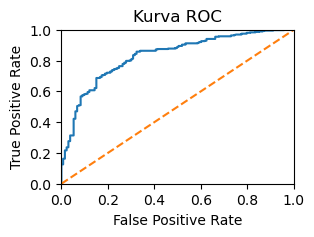

Skor AUC-ROC : 0.8309984362615941
Skor akurasi : 0.8037190082644629


In [86]:
#mendapatkan hyperparameter terbaik dan `refit` kedalam model
cb_2 = CatBoostClassifier(iterations=int(optimizer_cb.max['params']['iterations']),
                             depth=int(optimizer_cb.max['params']['depth']),
                          learning_rate=(optimizer_cb.max['params']['learning_rate']),
                          random_state=1,verbose=False
                             )
cb_2.fit(np.vstack([u_features_train, features_valid]), np.hstack([u_target_train, target_valid]))

#mendapatkan hyperparameter terbaiknya
score(cb_2,u_features_train,u_target_train,features_valid,target_valid,features_test,target_test)

In [87]:
print('iteration :', int(optimizer_cb.max['params']['iterations']))
print('depth :', int(optimizer_cb.max['params']['depth']))
print('learning_rate :',(optimizer_cb.max['params']['learning_rate']))

iteration : 102
depth : 4
learning_rate : 0.11683926010526348


### XGBoost Upsampled

In [88]:
import xgboost as xgb

def xg_objective(n_estimators, max_depth, learning_rate):
    xg = xgb.XGBClassifier(n_estimators=int(n_estimators), 
                            max_depth=int(max_depth), 
                            learning_rate=learning_rate)
    return np.mean(cross_val_score(xg, u_features_train, u_target_train, cv=10, scoring='roc_auc'))

pbounds = {'n_estimators': (10, 200), 'max_depth': (1,5), 'learning_rate': (0.01,0.3)}

optimizer_xg = BayesianOptimization(f=xg_objective, pbounds=pbounds, random_state=1)
optimizer_xg.maximize(n_iter=50)
print("Hyperparameter terbaik adalah:", optimizer_xg.max['params'])

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | 0.795     | 0.1309    | 3.881     | 10.02     |
| 2         | 0.7871    | 0.09768   | 1.587     | 27.54     |
| 3         | 0.8014    | 0.06402   | 2.382     | 85.39     |
| 4         | 0.8044    | 0.1663    | 2.677     | 140.2     |
| 5         | 0.7948    | 0.06929   | 4.512     | 15.2      |
| 6         | 0.8045    | 0.1943    | 2.658     | 125.5     |
| 7         | 0.7987    | 0.01      | 5.0       | 106.4     |
| 8         | 0.8045    | 0.1008    | 4.939     | 161.7     |
| 9         | 0.8036    | 0.156     | 1.011     | 183.4     |
| 10        | 0.8037    | 0.06438   | 4.669     | 199.9     |
| 11        | 0.7945    | 0.3       | 5.0       | 65.94     |
| 12        | 0.8038    | 0.2853    | 1.022     | 152.2     |
| 13        | 0.8037    | 0.3       | 1.0       | 170.7     |
| 14        | 0.7946    | 0.2687    | 4.949     | 131.9     |
| 15    

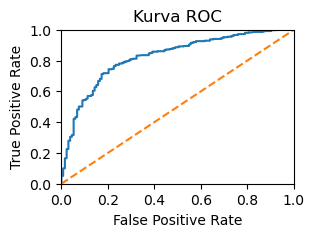

Skor AUC-ROC : 0.823972323972324
Skor akurasi : 0.7830578512396694


In [89]:
#mendapatkan hyperparameter terbaik dan `refit` kedalam model
xg_2 = xgb.XGBClassifier(n_estimators=int(optimizer_xg.max['params']['n_estimators']),
                             max_depth=int(optimizer_xg.max['params']['max_depth']),
                          learning_rate=(optimizer_xg.max['params']['learning_rate']),
                          random_state=1
                             )
xg_2.fit(np.vstack([u_features_train, features_valid]), np.hstack([u_target_train, target_valid]))
#mendapatkan hyperparameter terbaiknya
score(xg_2,u_features_train,u_target_train,features_valid,target_valid,features_test,target_test)

In [90]:
print('n_estimators :', int(optimizer_xg.max['params']['n_estimators']))
print('max_depth :', int(optimizer_xg.max['params']['max_depth']))
print('learning_rate :',(optimizer_xg.max['params']['learning_rate']))

n_estimators : 163
max_depth : 3
learning_rate : 0.10509777601236579


In [91]:
u_features_train.describe()

,TotalCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,One year,Two year,Credit card (automatic),Electronic check,Mailed check,Partner,InternetService
count,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.00000
mean,2972.369877,0.349708,0.440520,0.436803,0.353160,0.509028,0.503186,0.550186,0.196229,0.178439,0.208444,0.414233,0.138874,0.479288,0.65162
std,2415.306331,0.476941,0.496516,0.496056,0.478015,0.499985,0.500056,0.497541,0.397197,0.382932,0.406250,0.492654,0.345861,0.499637,0.47652
min,43.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,715.775000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2510.075000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,4910.350000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000
max,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Neural Network Upsampled

In [92]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC

In [93]:
from tensorflow.keras.optimizers import Adam
nn = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=features_train.shape[1]),
    layers.Dense(1, activation='sigmoid')
])

learning_rate=0.01
nn.compile(optimizer=Adam(learning_rate=learning_rate),
            loss='binary_crossentropy',metrics=AUC())
nn.fit(u_features_train,u_target_train,epochs=50,validation_data=(features_valid, target_valid))
predicted = nn.predict(features_test)
print('Skor AUC-ROC :', roc_auc_score(target_test, predicted))

Epoch 1/50
118/118 [==============================] - 1s 3ms/step - loss: 23.9090 - auc_1: 0.5654 - val_loss: 23.2608 - val_auc_1: 0.5937
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 12.6333 - auc_1: 0.5840 - val_loss: 15.2954 - val_auc_1: 0.6355
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 11.0650 - auc_1: 0.6133 - val_loss: 9.4879 - val_auc_1: 0.6612
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 8.6988 - auc_1: 0.6270 - val_loss: 1.5254 - val_auc_1: 0.7844
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 12.5610 - auc_1: 0.6011 - val_loss: 3.9698 - val_auc_1: 0.7263
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 8.4151 - auc_1: 0.6326 - val_loss: 6.7027 - val_auc_1: 0.6900
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 4.7366 - auc_1: 0.6771 - val_loss: 11.6835 - val_auc_1: 0.4929
Epoch 8/50
118/118 [=====================

Didapatkan skor auc_roc sebesar 0.826596405543774. Hasil yang serupa dengan model model lain.

## Optuna (Revisi)

Dilanjutkan dengan model optimisasi dari Optuna

### Dataset Normal

In [94]:
import optuna

def objective(trial):

    model_name = trial.suggest_categorical('model', ['Logreg', 'RF', 'XGB', 'CatBoost'])

    if model_name == 'Logreg':
        penalty_lr = trial.suggest_categorical('penalty', ['l2', 'none'])
        classifier_obj = LogisticRegression(penalty=penalty_lr)
    elif model_name == 'RF':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        classifier_obj = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif model_name == 'XGB':
        eta = trial.suggest_loguniform('eta', 1e-8, 1.0)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        learning_rate = trial.suggest_loguniform('learning_rate',1e-3, 3e-2)
        gamma = trial.suggest_float('gamma', 0, 1)
        classifier_obj = xgb.XGBClassifier(eta=eta, max_depth=max_depth, learning_rate = learning_rate)
    else:
        iterations = trial.suggest_int('iterations', 10, 200)
        depth = trial.suggest_int('depth', 1, 10)
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 3e-2)
        classifier_obj = CatBoostClassifier(iterations=iterations, depth=depth, verbose=False)
    
    classifier_obj.fit(features_train, target_train)
    pred = classifier_obj.predict_proba(features_valid)
    roc_auc = roc_auc_score(target_valid, pred[:,1])
    return roc_auc


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)



[I 2023-05-16 22:15:24,883] A new study created in memory with name: no-name-d71b5d65-2d7d-43b4-8719-077605ad4867
[I 2023-05-16 22:15:25,031] Trial 0 finished with value: 0.8104938008606365 and parameters: {'model': 'XGB', 'eta': 1.9114591608128993e-07, 'max_depth': 5, 'learning_rate': 0.010602641475977262, 'gamma': 0.9391714583128977}. Best is trial 0 with value: 0.8104938008606365.
[I 2023-05-16 22:15:25,129] Trial 1 finished with value: 0.817954070981211 and parameters: {'model': 'CatBoost', 'iterations': 111, 'depth': 3, 'learning_rate': 0.007479263449783509}. Best is trial 1 with value: 0.817954070981211.
[I 2023-05-16 22:15:25,232] Trial 2 finished with value: 0.8206637978782327 and parameters: {'model': 'CatBoost', 'iterations': 159, 'depth': 1, 'learning_rate': 0.004343416749661628}. Best is trial 2 with value: 0.8206637978782327.
[I 2023-05-16 22:15:25,296] Trial 3 finished with value: 0.8084103787652849 and parameters: {'model': 'Logreg', 'penalty': 'l2'}. Best is trial 2 wit

In [95]:
print("Model terbaik dengan hyperparameternya adalah :", study.best_params)

Model terbaik dengan hyperparameternya adalah : {'model': 'CatBoost', 'iterations': 200, 'depth': 1, 'learning_rate': 0.0028121892661625925}


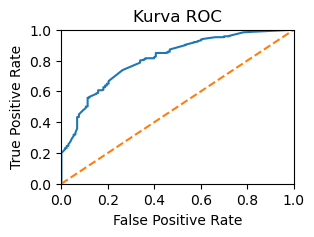

Skor AUC-ROC : 0.8098451256345994
Skor akurasi : 0.7727272727272727


In [100]:
cb_opt = CatBoostClassifier(iterations=200,
          depth=1,
          learning_rate=0.0028121892661625925,verbose=False)
score(cb_opt,u_features_train,u_target_train,features_valid,target_valid,features_test,target_test)

### Dataset Upsampling

In [97]:
def objective(trial):

    model_name = trial.suggest_categorical('model', ['Logreg', 'RF', 'XGB', 'CatBoost'])

    if model_name == 'Logreg':
        penalty_lr = trial.suggest_categorical('penalty', ['l2', 'none'])
        classifier_obj = LogisticRegression(penalty=penalty_lr)
    elif model_name == 'RF':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        classifier_obj = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif model_name == 'XGB':
        eta = trial.suggest_loguniform('eta', 1e-8, 1.0)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        learning_rate = trial.suggest_loguniform('learning_rate',1e-3, 3e-2)
        gamma = trial.suggest_float('gamma', 0, 1)
        classifier_obj = xgb.XGBClassifier(eta=eta, max_depth=max_depth, learning_rate = learning_rate)
    else:
        iterations = trial.suggest_int('iterations', 10, 200)
        depth = trial.suggest_int('depth', 1, 10)
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 3e-2)
        classifier_obj = CatBoostClassifier(iterations=iterations, depth=depth, verbose=False)
    
    classifier_obj.fit(u_features_train, u_target_train)
    pred = classifier_obj.predict_proba(features_valid)
    roc_auc = roc_auc_score(target_valid, pred[:,1])
    return roc_auc


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

[I 2023-05-16 22:19:04,803] A new study created in memory with name: no-name-c0211791-643d-4275-93a4-b3f71fa99c63
[I 2023-05-16 22:19:04,969] Trial 0 finished with value: 0.8095990797153936 and parameters: {'model': 'CatBoost', 'iterations': 81, 'depth': 6, 'learning_rate': 0.00503049639849601}. Best is trial 0 with value: 0.8095990797153936.
[I 2023-05-16 22:19:05,003] Trial 1 finished with value: 0.8003238038430404 and parameters: {'model': 'Logreg', 'penalty': 'none'}. Best is trial 0 with value: 0.8095990797153936.
[I 2023-05-16 22:19:05,259] Trial 2 finished with value: 0.7842827318818968 and parameters: {'model': 'XGB', 'eta': 1.1801478969484586e-06, 'max_depth': 9, 'learning_rate': 0.004275269484172181, 'gamma': 0.19905202219202756}. Best is trial 0 with value: 0.8095990797153936.
[I 2023-05-16 22:19:05,521] Trial 3 finished with value: 0.7997486259639555 and parameters: {'model': 'RF', 'n_estimators': 148, 'max_depth': 1}. Best is trial 0 with value: 0.8095990797153936.
[I 2023

In [98]:
print("Model terbaik dengan hyperparameternya adalah :", study.best_params)

Model terbaik dengan hyperparameternya adalah : {'model': 'CatBoost', 'iterations': 190, 'depth': 1, 'learning_rate': 0.0012475762886467456}


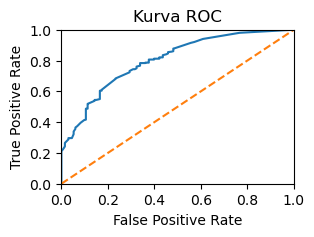

Skor AUC-ROC : 0.8011053274211168
Skor akurasi : 0.7252066115702479


In [99]:
cb_opt = CatBoostClassifier(iterations=190,
          depth=1,
          learning_rate=0.0012475762886467456,verbose=False)
score(cb_opt,u_features_train,u_target_train,features_valid,target_valid,features_test,target_test)

## Kesimpulan

Dari model yang sudah dibuat didapatkan


| Model                           | AUC-ROC |
|---------------------------------|----------|
| Logistic Regression             |   0.8230 |
| Logistic Regression Upsampled   |   0.8239 |
| Random Forest                   |   0.8348 |
| Random Forest Upsampled         |   0.8309 |
| CatBoost                        |   0.8315 |
| CatBoost Upsampled              |   0.8310 |
| XGBoost                         |   0.8320 |
| XGBoost Upsampled               |   0.8310 |
| Neural Network                  |   0.8240 |
| Neural Network Upsampled        |   0.8266 |
| Optuna - CatBoost               |   0.8098 |
| Optuna - CatBoost Upsampled     |   0.8011 |

1. Random Forest mendapatkan nilai terbaik yaitu 0.8348
2. Optimizer Optuna dengan model CatBoost mendapatkan nilai terburuk yaitu 0.8011.
3. Sedangkan model yang lain mendapatkan nilai nilai yang hampir mirip, berkisar di 0.83.
4. Model yang akan digunakan dalam kasus ini dengan dataset ini adalah Random Forest tanpa Upsampled.